## Import libraries and dataset

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import special, stats

data = pd.read_csv("dataset.csv")
data.head()

,ExperimentID,UserID,VideoID,Activity,StartResolution,EndResolution,Gender,Personality,SI,TI,Cluster,Glasses
0,1,111,11,Sitting,360,720,Male,Neuroticism,8.778,3.687,10,1
1,1,111,12,Sitting,360,480,Male,Neuroticism,38.861,36.951,10,1
2,1,111,13,Sitting,360,720,Male,Neuroticism,138.691,8.303,10,1
3,1,111,14,Sitting,360,720,Male,Neuroticism,136.498,28.590,10,1
4,1,111,21,Walking,360,720,Male,Neuroticism,14.343,3.491,10,1


## Role of physical activity

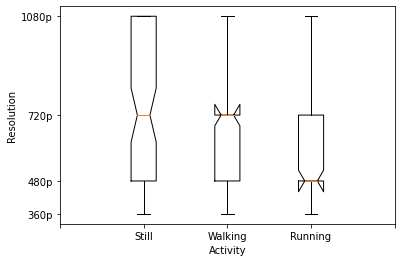

Kruskal-Wallis test:
 H: 	p-value: 
 19.817 5e-05
Effect size:  0.065


In [2]:
sitting = data[data["Activity"] == "Sitting"]
walking = data[data["Activity"] == "Walking"]
running = data[data["Activity"] == "Running"]

plt.boxplot([sitting["EndResolution"], walking["EndResolution"], running["EndResolution"]], notch=True)

plt.xlabel("Activity")
plt.xticks(np.arange(5), ["", "Still", "Walking", "Running", ""])

plt.ylabel("Resolution")
plt.yticks([360, 480, 720, 1080], ["360p", "480p", "720p", "1080p"])
#plt.savefig("activityBoxplot.pdf")
plt.show()

#Kruskal-Wallis test
KWstat = stats.kruskal(sitting["EndResolution"], walking["EndResolution"], running["EndResolution"])
print("Kruskal-Wallis test:\n", "H: \tp-value: \n", round(KWstat.statistic, 3), round(KWstat.pvalue, 5))
effectSize = (KWstat.statistic - 3 + 1) / (len(data) - 3)
print("Effect size: ", round(effectSize, 3))

#correlation coef. EndResolution - SI/TI [groups: sitting, walking, running]
sittingCorSI = np.corrcoef((sitting["EndResolution"].to_numpy().T, sitting["SI"].to_numpy().T)) # -0.45
sittingCorTI = np.corrcoef((sitting["EndResolution"].to_numpy().T, sitting["TI"].to_numpy().T)) # -0.13

walkingCorSI = np.corrcoef((walking["EndResolution"].to_numpy().T, walking["SI"].to_numpy().T)) # -0.05
walkingCorTI = np.corrcoef((walking["EndResolution"].to_numpy().T, walking["TI"].to_numpy().T)) # -0.11

runningCorSI = np.corrcoef((running["EndResolution"].to_numpy().T, running["SI"].to_numpy().T)) # -0.28
runningCorTI = np.corrcoef((running["EndResolution"].to_numpy().T, running["TI"].to_numpy().T)) # 0.02

## Role of SI/TI (groups of videos)

You can ignore the 4 diagrams where I've separated the videos by SI and TI.
The last two provide more information.

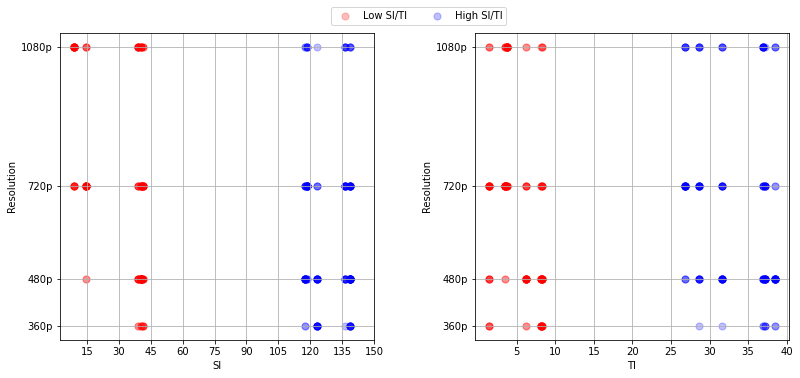

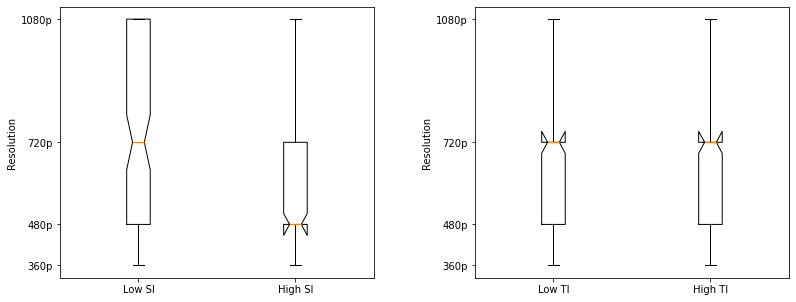

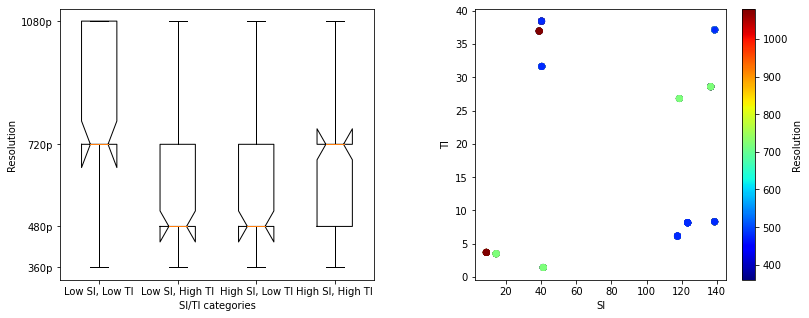

In [3]:
size = 50
alpha = 0.25

LL = data[data["VideoID"].isin([11, 21, 31])]
LH = data[data["VideoID"].isin([12, 22, 32])]
HL = data[data["VideoID"].isin([13, 23, 33])]
HH = data[data["VideoID"].isin([14, 24, 34])]

#scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 6.5))
fig.tight_layout(pad=7.0)

a = ax1.scatter(LL["SI"], LL["EndResolution"], size, alpha=alpha, color="r")
ax1.scatter(LH["SI"], LH["EndResolution"], size, alpha=alpha, color="r")
b = ax1.scatter(HL["SI"], HL["EndResolution"], size, alpha=alpha, color="b")
ax1.scatter(HH["SI"], HH["EndResolution"], size, alpha=alpha, color="b")

ax1.grid(b=True, axis="both")
ax1.set_xlabel("SI")
ax1.set_ylabel("Resolution")
ax1.set_xticks(range(15, 151, 15))
ax1.set_yticks([360, 480, 720, 1080])
ax1.set_yticklabels(["360p", "480p", "720p", "1080p"])

ax2.scatter(LL["TI"], LL["EndResolution"], size, alpha=alpha, color="r")
ax2.scatter(HL["TI"], HL["EndResolution"], size, alpha=alpha, color="r")
ax2.scatter(LH["TI"], LH["EndResolution"], size, alpha=alpha, color="b")
ax2.scatter(HH["TI"], HH["EndResolution"], size, alpha=alpha, color="b")

ax2.grid(b=True, axis="both")
ax2.set_xlabel("TI")
ax2.set_ylabel("Resolution")
ax2.set_xticks(range(5, 41, 5))
ax2.set_yticks([360, 480, 720, 1080])
ax2.set_yticklabels(["360p", "480p", "720p", "1080p"])

plt.legend([a,b], ["Low SI/TI", "High SI/TI"], loc="upper center", bbox_to_anchor=(-0.18, 1.1), ncol=2)
plt.show()

#boxplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 6))
fig.tight_layout(pad=7.0)

ax1.boxplot([LL.append(LH)["EndResolution"], HL.append(HH)["EndResolution"]], notch=True)
ax1.set_xticklabels(["Low SI", "High SI"])
ax1.set_ylabel("Resolution")
ax1.set_yticks([360, 480, 720, 1080])
ax1.set_yticklabels( ["360p", "480p", "720p", "1080p"])

ax2.boxplot([LL.append(HL)["EndResolution"], LH.append(HH)["EndResolution"]], notch=True)
ax2.set_xticklabels(["Low TI", "High TI"])
ax2.set_ylabel("Resolution")
ax2.set_yticks([360, 480, 720, 1080])
ax2.set_yticklabels(["360p", "480p", "720p", "1080p"])
plt.show()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12.5, 6))
fig.tight_layout(pad=7.0)
ax1.boxplot([LL["EndResolution"], LH["EndResolution"], HL["EndResolution"], HH["EndResolution"]], notch=True)
ax1.set_xlabel("SI/TI categories")
ax1.set_ylabel("Resolution")
ax1.set_xticks([1, 2, 3, 4])
ax1.set_xticklabels(["Low SI, Low TI", "Low SI, High TI", "High SI, Low TI", "High SI, High TI"])
ax1.set_yticks([360, 480, 720, 1080])
ax1.set_yticklabels(["360p", "480p", "720p", "1080p"])

fig.colorbar(plt.scatter(data["SI"], data["TI"], c=[data["EndResolution"]], cmap="jet"), label="Resolution")
ax2.set_xlabel("SI")
ax2.set_ylabel("TI")
#plt.savefig("SITI.pdf")
plt.show()
#plt.boxplot([LL["EndResolution"], LH["EndResolution"], HL["EndResolution"], HH["EndResolution"]], notch=True)
#plt.xlabel("SI/TI categories")
#plt.ylabel("Resolution")
#plt.xticks([1, 2, 3, 4], ["Low SI, Low TI", "Low SI, High TI", "High SI, Low TI", "High SI, High TI"])
#plt.yticks([360, 480, 720, 1080], ["360p", "480p", "720p", "1080p"])
#plt.show()

In [4]:
KWstat = stats.kruskal(LL["EndResolution"], LH["EndResolution"], HL["EndResolution"], HH["EndResolution"])
print("Kruskal-Wallis test:\n", "H: \tp-value: \n", round(KWstat.statistic, 3), round(KWstat.pvalue, 3))

effectSize = (KWstat.statistic - 4 + 1) / (len(data) - 4)
print("Effect size: ", round(effectSize, 3))

# correlation coef. EndResolution - SI/TI - [groups: Low SI, Low TI; Low SI, High TI; High SI, Low TI; High SI, High TI]
LLcorrSI = np.corrcoef((LL["EndResolution"].T, LL["SI"].T)) # -0.5
LLcorrTI = np.corrcoef((LL["EndResolution"].T, LL["TI"].T)) # 0.47

LHcorrSI = np.corrcoef((LH["EndResolution"].T, LH["SI"].T)) # -0.26
LHcorrTI = np.corrcoef((LH["EndResolution"].T, LH["TI"].T)) # -0.04

HLcorrSI = np.corrcoef((HL["EndResolution"].T, HL["SI"].T)) # 0.07
HLcorrTI = np.corrcoef((HL["EndResolution"].T, HL["TI"].T)) # -0.07

HHcorrSI = np.corrcoef((HH["EndResolution"].T, HH["SI"].T)) # -0.32
HHcorrTI = np.corrcoef((HH["EndResolution"].T, HH["TI"].T)) # -0.4

Kruskal-Wallis test:
 H: 	p-value: 
 42.613 0.0
Effect size:  0.146


## Role of SI/TI (all videos)

In [5]:
v1 = data[data["VideoID"].isin([11])] # LL sitting
v2 = data[data["VideoID"].isin([12])] # LH sitting
v3 = data[data["VideoID"].isin([13])] # HL sitting
v4 = data[data["VideoID"].isin([14])] # HH sitting
v5 = data[data["VideoID"].isin([21])] # LL walking
v6 = data[data["VideoID"].isin([22])] # LH walking
v7 = data[data["VideoID"].isin([23])] # HL walking
v8 = data[data["VideoID"].isin([24])] # HH walking
v9 = data[data["VideoID"].isin([31])] # LL running
v10 = data[data["VideoID"].isin([32])] # LH running
v11 = data[data["VideoID"].isin([33])] # HL running
v12 = data[data["VideoID"].isin([34])] # HH running

KWstat = stats.kruskal(v1["EndResolution"], v2["EndResolution"], v3["EndResolution"], v4["EndResolution"],
             v5["EndResolution"], v6["EndResolution"], v7["EndResolution"], v8["EndResolution"],
             v9["EndResolution"], v10["EndResolution"], v11["EndResolution"], v12["EndResolution"])

print("Kruskal-Wallis test:\n", "H: \tp-value: \n", round(KWstat.statistic, 3), round(KWstat.pvalue, 5))
effectSize = (KWstat.statistic - 12 + 1) / (len(data) - 12)
print("Effect size: ", round(effectSize, 3))

Kruskal-Wallis test:
 H: 	p-value: 
 79.045 0.0
Effect size:  0.258


## Role of Personality

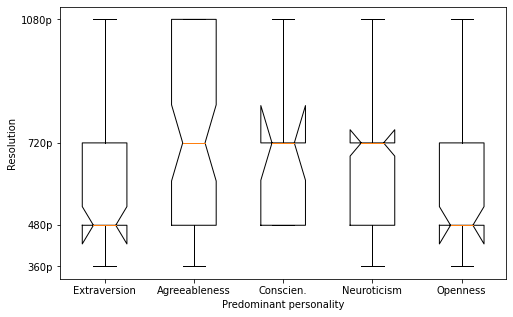

Kruskal-Wallis test:
 H: 	p-value: 
 15.705 0.00344
Effect size:  0.043


In [6]:
extraversion = data[data["Personality"] == "Extraversion"]
agreeableness = data[data["Personality"] == "Agreeableness"]
conscientiousness = data[data["Personality"] == "Conscientiousness"]
neuroticism = data[data["Personality"] == "Neuroticism"]
openness = data[data["Personality"] == "Openness"]

plt.figure(figsize=(8, 5))
plt.boxplot([extraversion["EndResolution"], agreeableness["EndResolution"],
             conscientiousness["EndResolution"], neuroticism["EndResolution"], 
             openness["EndResolution"]], notch=True, manage_ticks=True)

plt.xlabel("Predominant personality")
plt.xticks([1, 2, 3, 4, 5], ["Extraversion", "Agreeableness", "Conscien.", "Neuroticism", "Openness"])

plt.ylabel("Resolution")
plt.yticks([360, 480, 720, 1080], ["360p", "480p", "720p", "1080p"])
#plt.savefig("personalityBoxplot.pdf")
plt.show()

#Kruskal-Wallis test
KWstat = stats.kruskal(extraversion["EndResolution"], agreeableness["EndResolution"],
                       conscientiousness["EndResolution"], neuroticism["EndResolution"], openness["EndResolution"])

print("Kruskal-Wallis test:\n", "H: \tp-value: \n", round(KWstat.statistic, 3), round(KWstat.pvalue, 5))

effectSize = (KWstat.statistic - 5 + 1) / (len(data) - 5)
print("Effect size: ", round(effectSize, 3))

#correlation coef. EndResolution - SI/TI [groups: extraversion, agreeableness, conscien., neuroticism, openness]
extraversionCorrSI = np.corrcoef(extraversion["EndResolution"].T, extraversion["SI"].T) # - 0.15
extraversionCorrTI = np.corrcoef(extraversion["EndResolution"].T, extraversion["TI"].T) # - 0.04
agreeablenessSI = np.corrcoef(agreeableness["EndResolution"].T, agreeableness["SI"].T) # - 0.13
agreeablenessTI = np.corrcoef(agreeableness["EndResolution"].T, agreeableness["TI"].T) # - 0.05
conscientiousnessSI = np.corrcoef(conscientiousness["EndResolution"].T, conscientiousness["SI"].T) # - 0.43
conscientiousnessTI = np.corrcoef(conscientiousness["EndResolution"].T, conscientiousness["TI"].T) # - 0.04
neuroticismSI = np.corrcoef(neuroticism["EndResolution"].T, neuroticism["SI"].T) # - 0.44
neuroticismTI = np.corrcoef(neuroticism["EndResolution"].T, neuroticism["TI"].T) # - 0.06
opennessSI = np.corrcoef(openness["EndResolution"].T, openness["SI"].T) # - 0.43
opennessTI = np.corrcoef(openness["EndResolution"].T, openness["TI"].T) # - 0.21

## Debug cell